#### Problem Summary: Predicting Demand for Shared Bikes

The assignment involves building a multiple linear regression model to predict the demand for shared bikes for a bike-sharing system in the American market. The bike-sharing provider, BoomBikes, is facing revenue challenges due to the COVID-19 pandemic and aims to develop a strategic business plan to revitalize revenue once the pandemic subsides.

The objective is to identify significant variables that influence bike demand and create an accurate model to describe the demand based on these factors. The model's insights will guide BoomBikes in adapting their business strategy to meet customer expectations and effectively manage demand dynamics post-pandemic, potentially expanding into new markets.



#### Data Reading & Data understanding 

In [93]:
# Importing numpy and pandas 
import numpy as np
import pandas as pd 

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
# Loading the data and reading them
bike_data=pd.read_csv('day.csv')

# Reading first 5 rows 
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [95]:
# Shape check
bike_data.shape

(730, 16)

In [96]:
# info of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [97]:
# description 
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Pre- Processing

In [98]:
# Dropping 'instant' col (as it is id col)
bike_data = bike_data.drop(columns=['instant'])

In [99]:
# Checking the dropping status 
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [100]:
# Dropping 'dteday'
bike_data=bike_data.drop(columns=['dteday'])

In [101]:
# Dropping "casual" and "registered" col as they are of no use
bike_data=bike_data.drop(columns=['casual','registered'])

In [102]:
# Checking the data set after dropping 
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Treating Non-Binary columns (Categorical columns)
- As per data dictionary 

In [103]:
# By looking at the data dictionary , we came to know that we need to change some of the col values . 

# Changing the values of season col as per data dict
# Define a mapping dictionary for season
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Apply the mapping to the 'season' column
bike_data['season'] = bike_data['season'].map(season_mapping)

# Display the updated dataset
bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [104]:
# Working on "mnth" col
mon_map={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

# Applying mapping 
bike_data['mnth']=bike_data['mnth'].map(mon_map)


In [105]:
# Working on 'weathersit' col
wh_map ={1:'Clear', 2:'Mist', 3:'Light_rain_snow', 4:'Heavy_rain_snow'}
# Applying mapping
bike_data['weathersit']=bike_data['weathersit'].map(wh_map)

In [106]:
# Checking weekday col
bike_data.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [107]:
# "weekday"
day_map={0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday' , 5:'Friday', 6:'Saturday'}

# Applying 
bike_data.weekday=bike_data.weekday.map(day_map)

# Data set check 
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA

In [108]:
# Importing lib
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

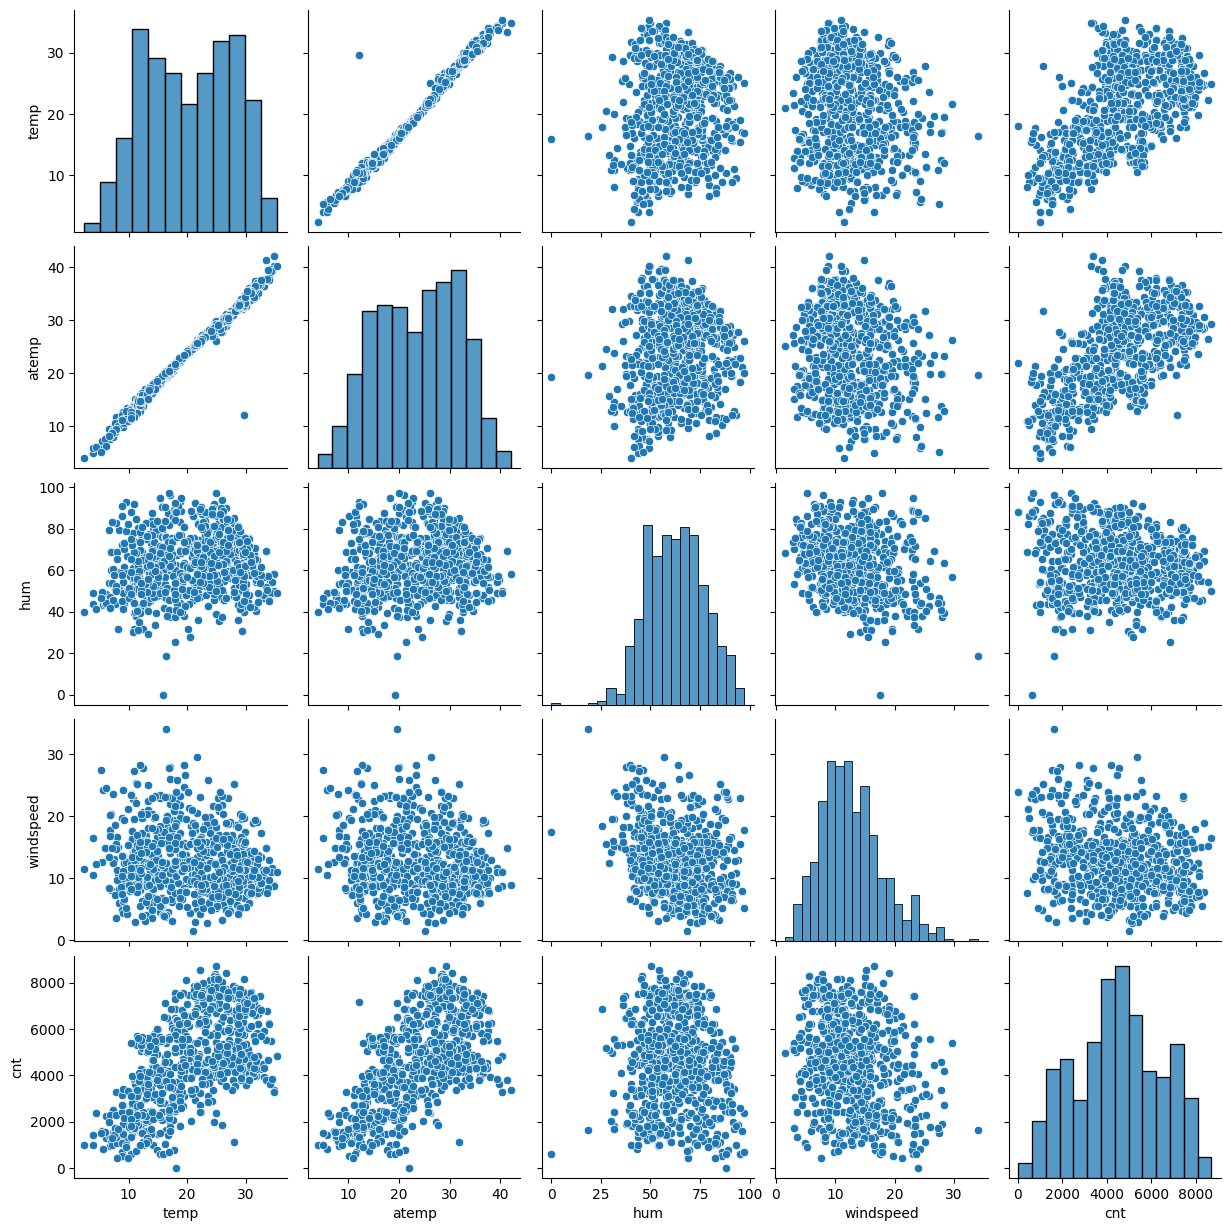

In [110]:
# creating list of all the num col
num_col=['temp','atemp', 'hum', 'windspeed', 'cnt']

#Pairplot for numeric variables
sns.pairplot(bike_data, vars=num_col)
plt.show()

In [111]:
# Creating list of categorical col
cat_col=[]
for i in bike_data.columns:
    if bike_data[i].dtype=='object' or bike_data[i].dtype=='O':
        cat_col.append(i)
    else:
        pass

print(cat_col)

['season', 'mnth', 'weekday', 'weathersit']


In [112]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [113]:
# Along with above cat_col we have some more categorical columns mentioned in data dictionary 

# Adding those col 
cat=['yr','holiday','workingday']

# Adding both the list 
cat_col=cat_col+cat

# checking 
print(cat_col)

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']


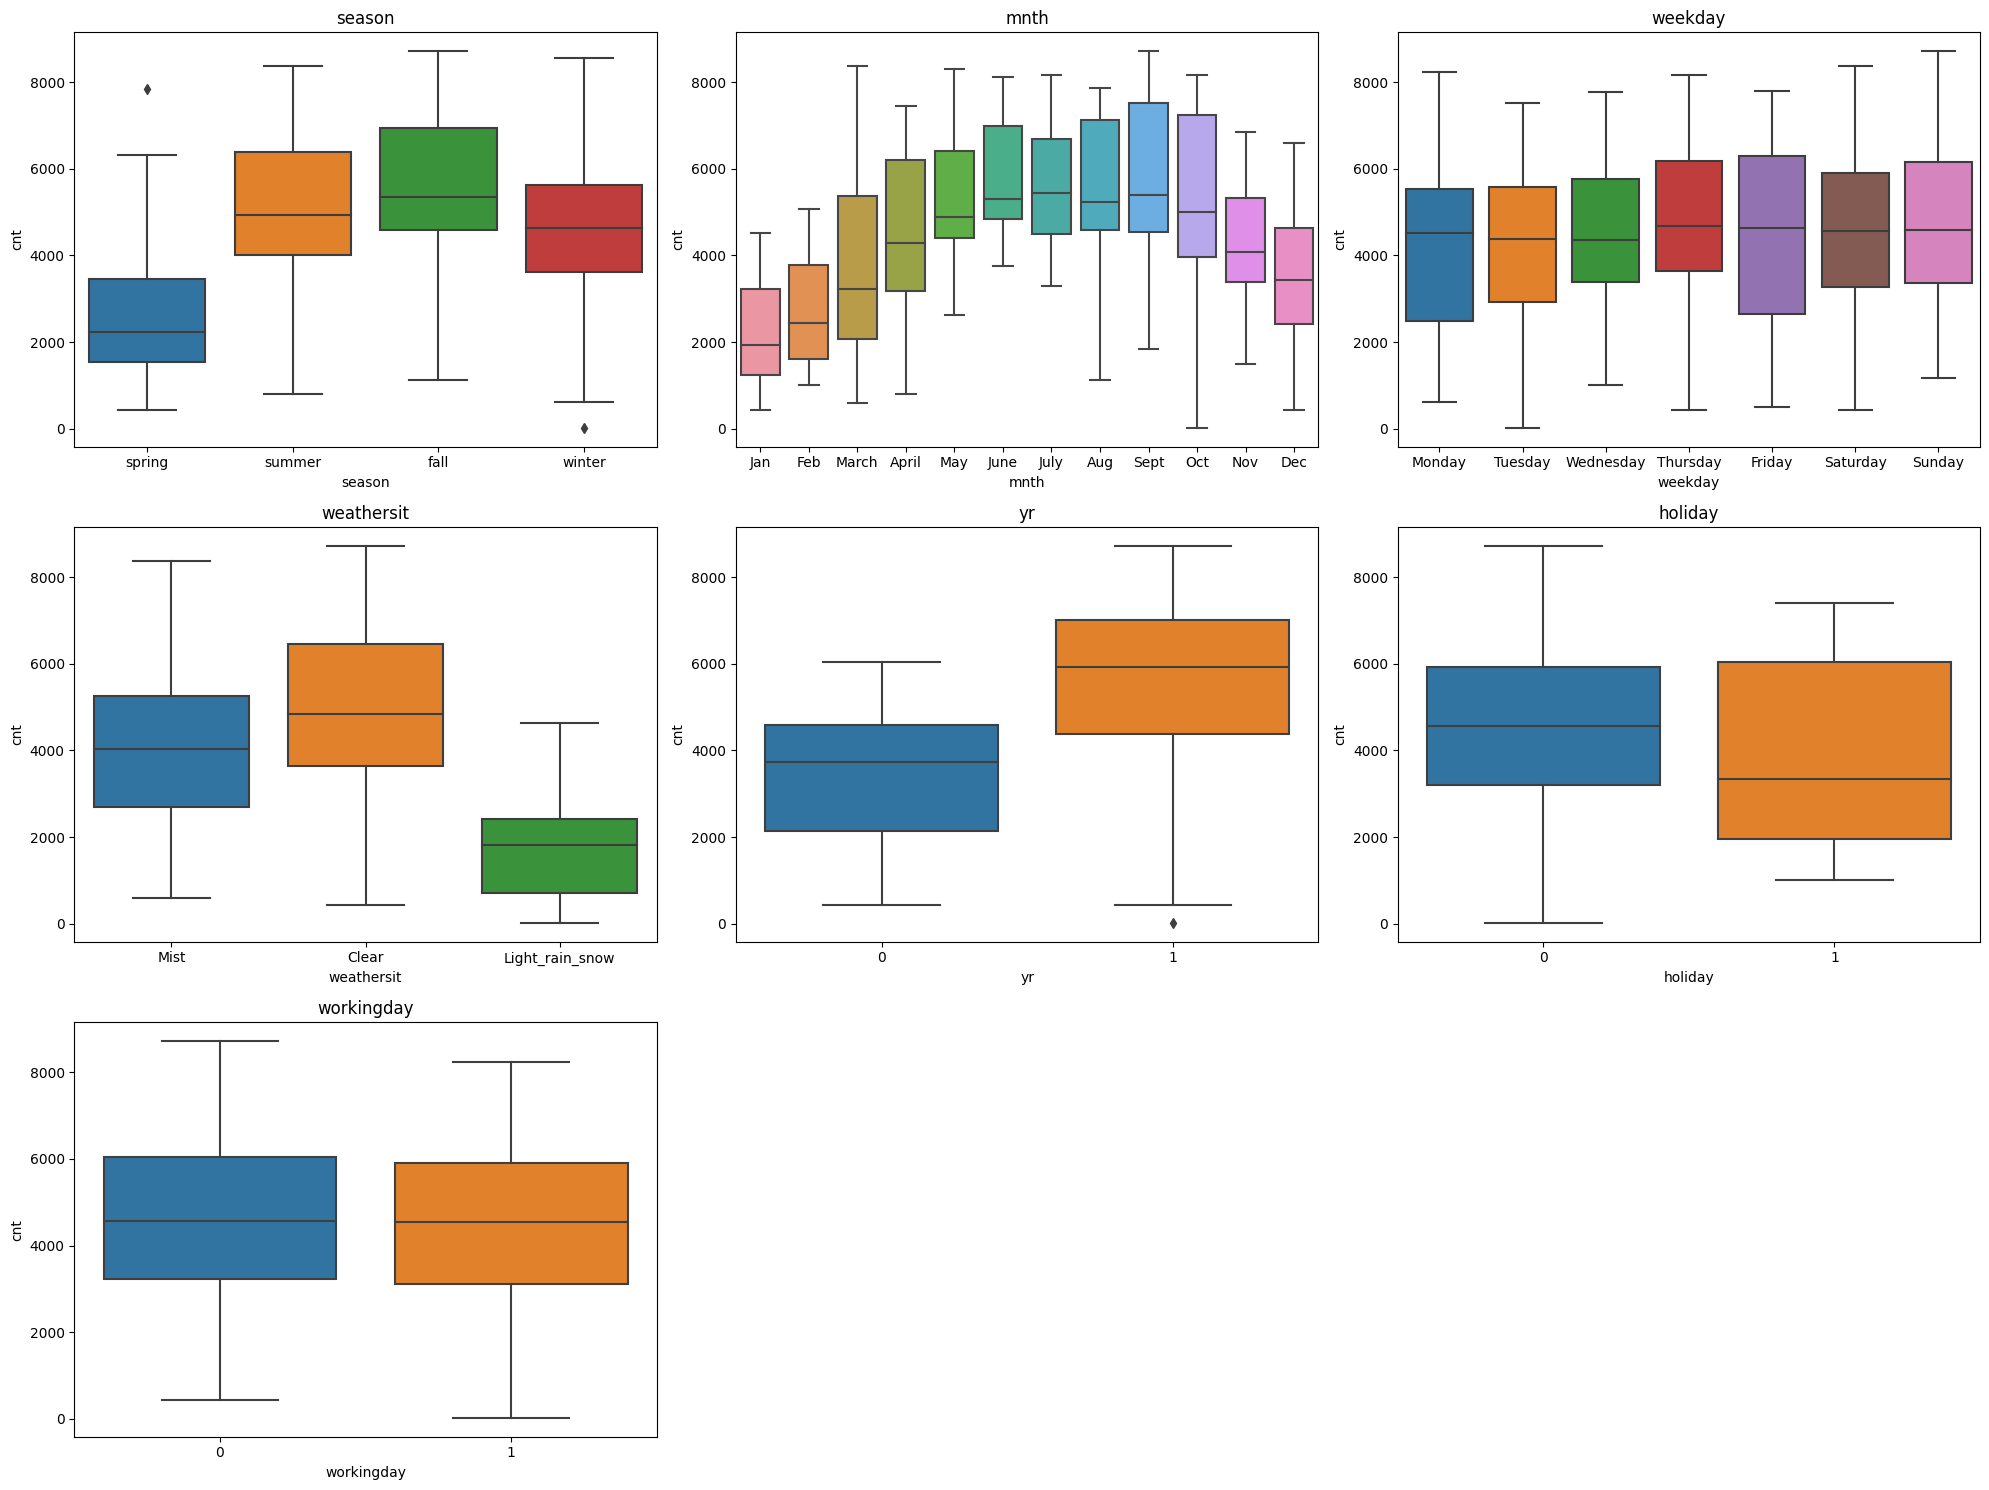

In [114]:
# Calculate the number of rows needed
num_rows = -(-len(cat_col) // 3)  # Round up division

# Initialize variables
n = 1

# Create a new figure and set its size
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through categorical variables and create box plots
for i in cat_col:
    plt.subplot(num_rows, 3, n)
    sns.boxplot(x=i, y='cnt', data=bike_data)
    plt.title(i)  # Add the variable name as the title
    n += 1

    # Break the loop if we have created all the plots
    if n > len(cat_col):
        break

plt.tight_layout()
plt.show()


#### Observation :

- "Fall" season have high number of bike rental then that of other season.
- Month of sept and july have the highest bike rentals.
- Rentals are more in 2019 then that 2018. 
- Bike rental are more which the weather situation is clear.

This are the some basic observation.

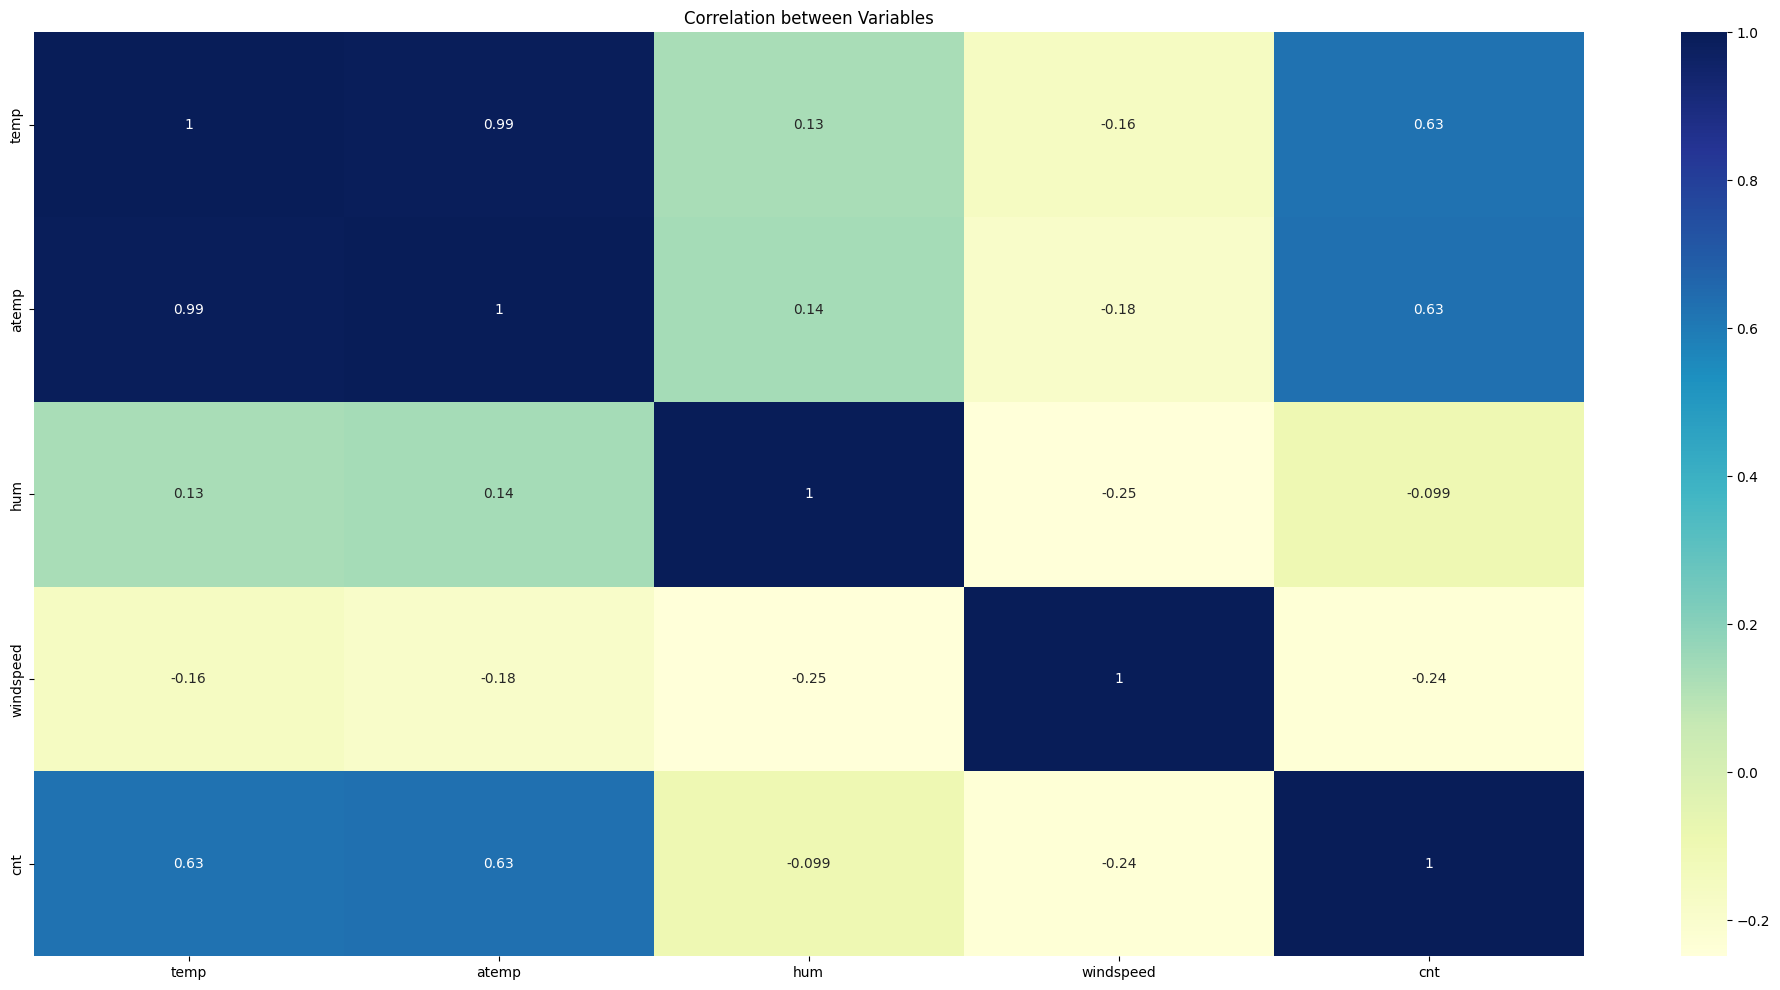

In [115]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike_data[num_col].corr() , annot = True, cmap='YlGnBu')
plt.title("Correlation between Variables")
plt.show()

### Dummy Columns : non-binary categorical columns

In [116]:
# Making list of all the non-binary categorical columns 
non_bincol=['season','mnth','weekday','weathersit']

# dummy creation
import pandas as pd
dum=pd.get_dummies(bike_data[non_bincol], drop_first=True).astype(int)

# dummy check
dum.head()


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain_snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concat the dummy with data set

In [117]:
bike_data=pd.concat([bike_data,dum],axis=1)

In [118]:
# Dropping columns after dummy creation
bike_data=bike_data.drop(columns=non_bincol)

# dataset check
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_rain_snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# columns check
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light_rain_snow', 'weathersit_Mist'],
      dtype='object')

In [120]:
# Renaming some of the columns 
column_name_mapping = {'season_spring': 'spring','season_summer':'summer', 'season_winter':'winter', 'mnth_Aug':'Aug',
       'mnth_Dec':'Dec', 'mnth_Feb':'Feb', 'mnth_Jan':'Jan', 'mnth_July':'July', 'mnth_June':'June',
       'mnth_March':'March', 'mnth_May':'May', 'mnth_Nov':'Nov', 'mnth_Oct':'Oct', 'mnth_Sept':'Sept',
       'weekday_Monday':'Monday', 'weekday_Saturday':'Saturday', 'weekday_Sunday':'Sunday',
       'weekday_Thursday':'Thursday', 'weekday_Tuesday':'Tuesday', 'weekday_Wednesday':'Wednesday',
       'weathersit_Light_rain_snow':'Light Rain', 'weathersit_Mist':'Mist'}


# mapping 
bike_data = bike_data.rename(columns=column_name_mapping)

In [121]:
# data set check 

bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# dropping atemp 
bike_data=bike_data.drop(columns='atemp')

In [123]:
# shape check 
bike_data.shape

(730, 29)

### Splitting into train and test

In [124]:
# Importing lib
import sklearn
from sklearn.model_selection import train_test_split

In [125]:
# Creating train and test data set 

df_train , df_test =train_test_split(bike_data,train_size=0.7,random_state=100)
print(df_test.shape)
print(df_train.shape)

(220, 29)
(510, 29)


### Rescaling the features

In [126]:
# Importing lib 
from sklearn.preprocessing import MinMaxScaler

In [127]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [128]:
# description of num_vars
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Training the Model

In [129]:
# Correlation check 
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
yr,1.000000,-0.014980,-0.003005,0.108054,-0.084061,-0.000439,0.591433,-0.036320,0.018294,-0.027174,...,-0.025933,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.011388
holiday,-0.014980,1.000000,-0.254149,-0.066405,-0.029224,0.017458,-0.095948,0.053339,-0.063798,0.051582,...,-0.004302,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038895
workingday,-0.003005,-0.254149,1.000000,-0.007143,0.021192,-0.002071,-0.009071,-0.032886,0.033299,0.033299,...,0.021720,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.066206
temp,0.108054,-0.066405,-0.007143,1.000000,0.155252,-0.187281,0.645048,-0.606396,0.126057,-0.234200,...,-0.018286,0.207212,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,-3.622709e-02,-0.089452
hum,-0.084061,-0.029224,0.021192,0.155252,1.000000,-0.267126,-0.058793,-0.201616,-0.014192,0.173980,...,0.167153,0.152439,-0.030833,0.002489,-0.027699,-0.057323,0.033232,0.028329,2.449653e-01,0.479436
windspeed,-0.000439,0.017458,-0.002071,-0.187281,-0.267126,1.000000,-0.253038,0.180351,0.110441,-0.090740,...,-0.018546,-0.121930,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,8.677832e-02,-0.029892
cnt,0.591433,-0.095948,-0.009071,0.645048,-0.058793,-0.253038,1.000000,-0.548987,0.140259,0.025945,...,0.055558,0.201639,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,-2.266784e-01,-0.169715
spring,-0.036320,0.053339,-0.032886,-0.606396,-0.201616,0.180351,-0.548987,1.000000,-0.324666,-0.324666,...,-0.171986,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,-4.455809e-02,0.011613
summer,0.018294,-0.063798,0.033299,0.126057,-0.014192,0.110441,0.140259,-0.324666,1.000000,-0.328125,...,-0.173818,-0.169366,-0.019069,-0.004143,-0.017097,0.064448,-0.003418,-0.000625,-4.590079e-02,0.043202
winter,-0.027174,0.051582,0.033299,-0.234200,0.173980,-0.090740,0.025945,-0.324666,-0.328125,1.000000,...,0.529732,-0.018884,0.018626,-0.017687,-0.030308,-0.052383,0.047105,0.039249,1.155434e-01,0.024076


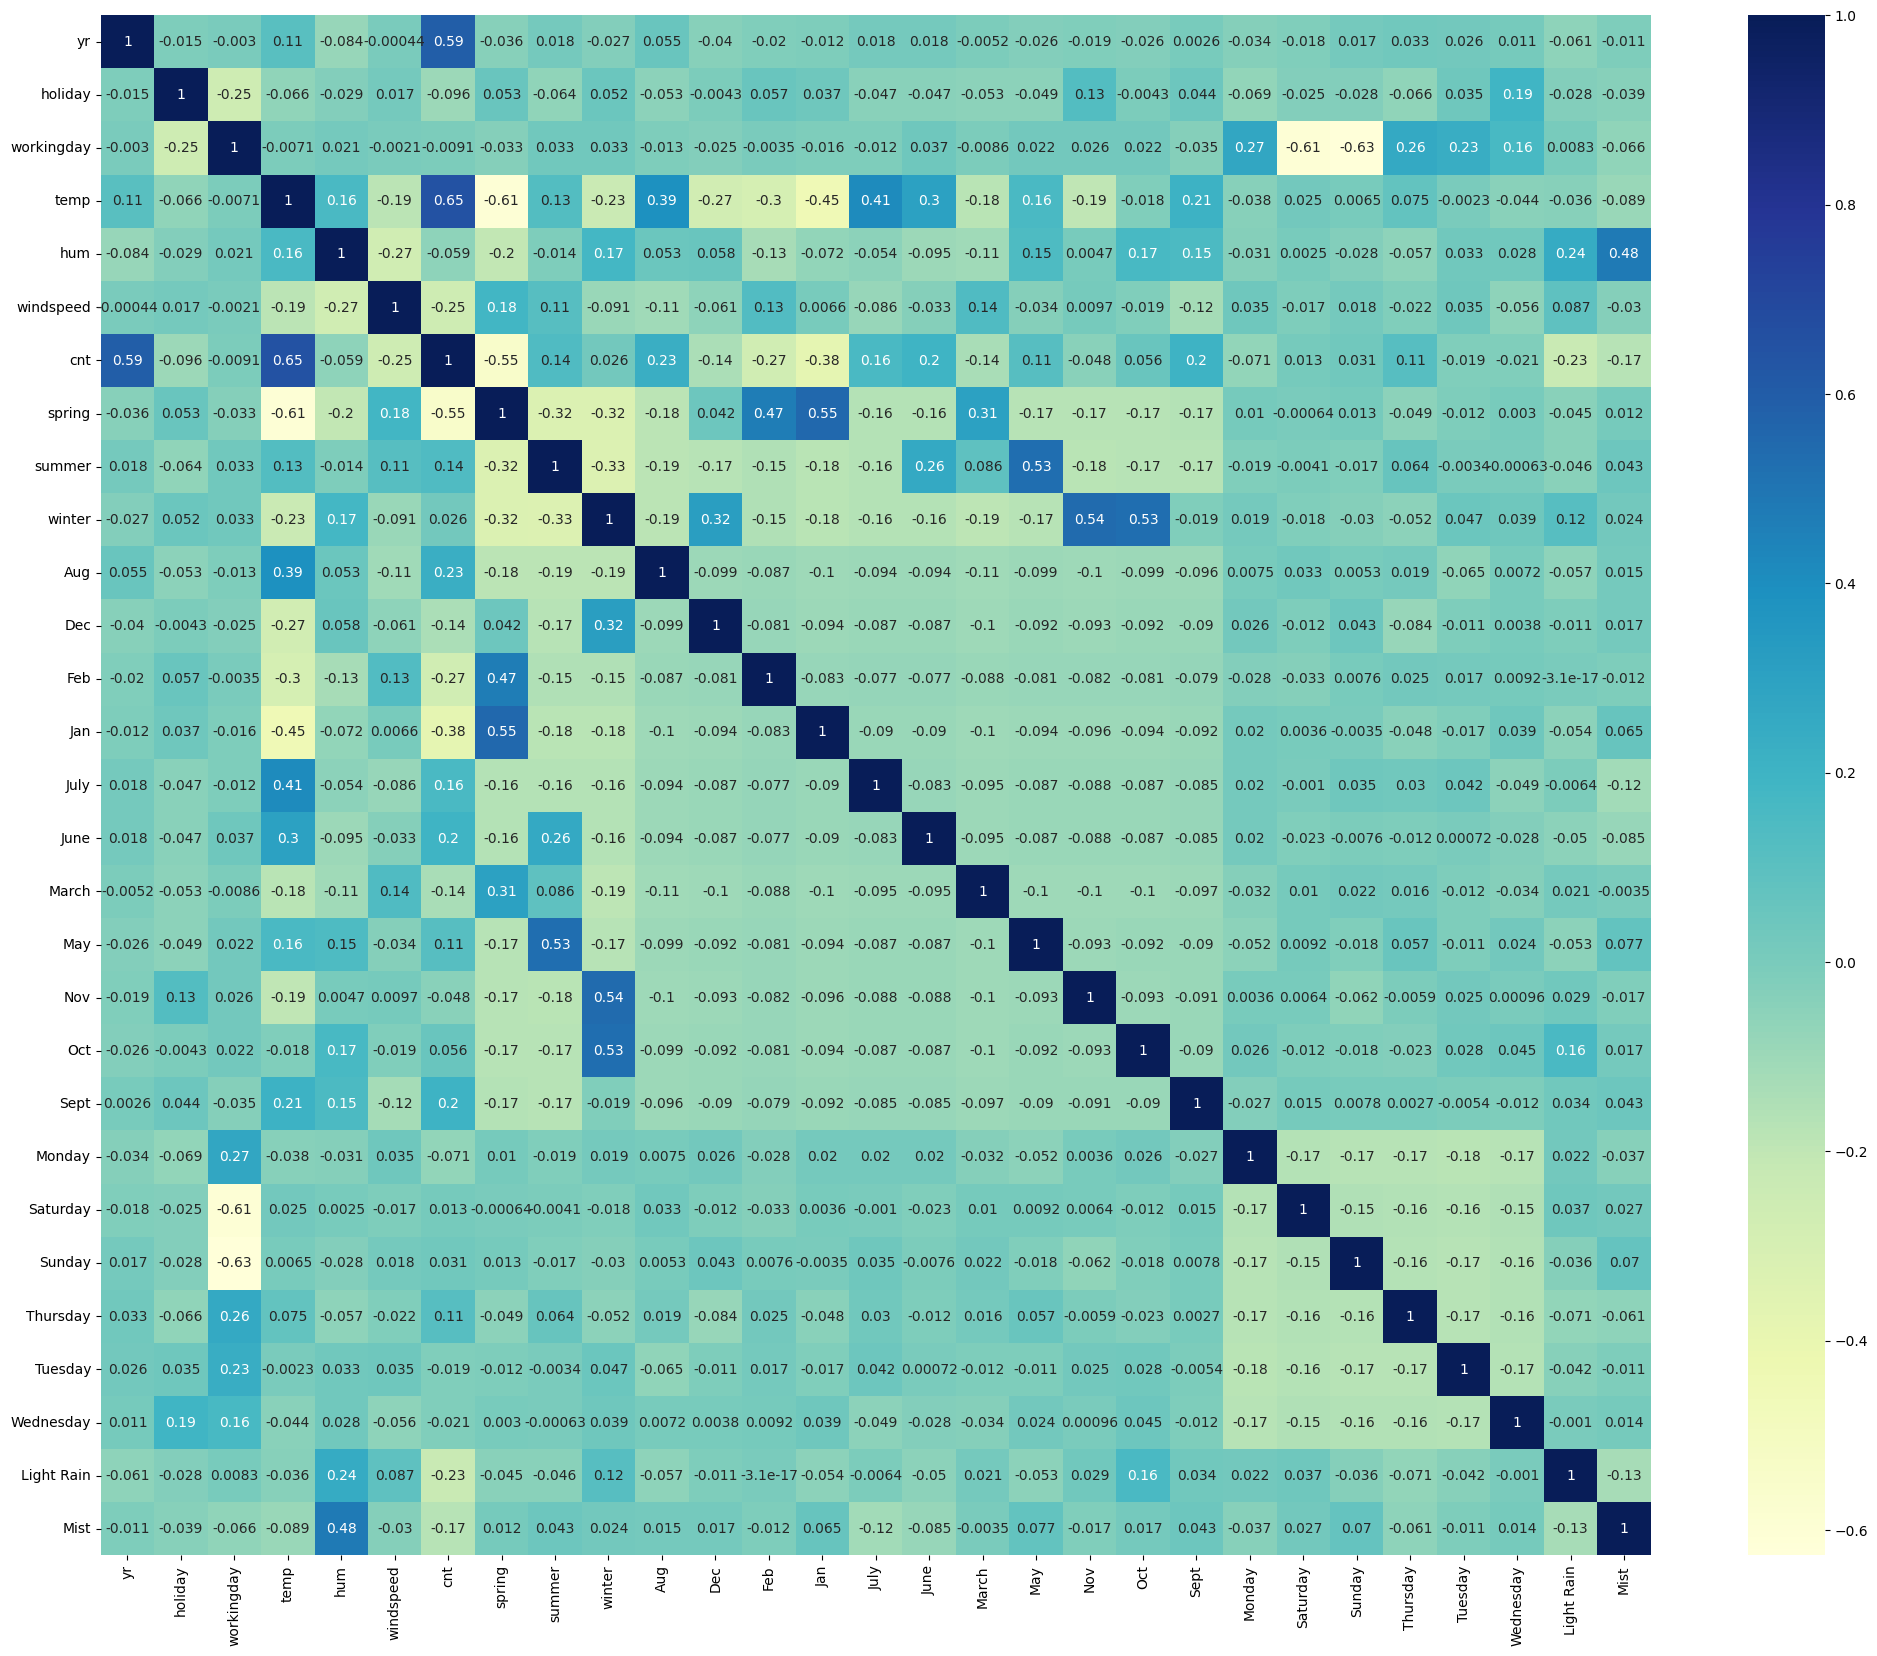

In [130]:
# To check correlation plotting heatmap

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Building Model : Feature Selection

In [131]:
y_train = df_train.pop('cnt')
X_train = df_train

In [132]:
# Importing lib for model building 

import statsmodels.api as sm

In [133]:
# looking into the X_train data
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [134]:
# Building a model with all the variables 

X_train_sm=sm.add_constant(X_train)

# creating model
lr=sm.OLS(y_train,X_train_sm)

# Fitting the model

lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.34e-178
Time:                        11:29:25   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3912      0.085      4.594      0.000       0.224       0.558
yr             0.2311      0.008     28.384      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp           0.4405      0.047      9.412      0.000       0.349       0.532
hum           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
spring        -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer         0.0464      0.026      1.761      0.079      -0.005       0.098
winter         0.1126      0.028      3.994      0.000       0.057       0.168
Aug            0.0273      0.034      0.806      0.421      -0.039       0.094
Dec           -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb           -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan           -0.0642      0.034     -1.894      0.059      -0.131       0.002
July          -0.0285      0.035     -0.808      0.420      -0.098       0.041
June           0.0084      0.025      0.336      0.737      -0.041       0.058
March          0.0008      0.025      0.032      0.974      -0.048       0.050
May            0.0247      0.021      1.164      0.245      -0.017       0.066
Nov           -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct            0.0056      0.036      0.156      0.876      -0.066       0.077
Sept           0.0908      0.032      2.822      0.005       0.028       0.154
Monday        -0.0246      0.015     -1.687      0.092      -0.053       0.004
Saturday      -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sunday        -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thursday       0.0042      0.015      0.282      0.778      -0.025       0.034
Tuesday       -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wednesday     -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light Rain    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Mist          -0.0578      0.011     -5.495      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### Checking VIF

In [135]:
# Importing lib for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
# Create a data-frame that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.77
4,hum,41.18
6,spring,13.50
8,winter,12.40
22,Sunday,12.34
21,Saturday,11.83
7,summer,9.85
17,Nov,7.16
18,Oct,6.82


In [137]:
# Dropping col with high p-value first as it will change the VIF value in second model ----> March (p-value= 0.974)
X= X_train.drop('March',axis=1)

In [138]:
# Creating another model 

# creating constant
X_train_sm=sm.add_constant(X)

# create model
lr=sm.OLS(y_train,X_train_sm)

# Fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.32e-179
Time:                        11:29:25   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3917      0.084      4.684      0.000       0.227       0.556
yr             0.2311      0.008     28.414      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.061      0.040      -0.263      -0.006
workingday    -0.0600      0.071     -0.845      0.399      -0.200       0.080
temp           0.4403      0.046      9.550      0.000       0.350       0.531
hum           -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed     -0.1825      0.026     -7.020      0.000      -0.234      -0.131
spring        -0.0401      0.029     -1.401      0.162      -0.096       0.016
summer         0.0463      0.026      1.790      0.074      -0.005       0.097
winter         0.1128      0.028      4.075      0.000       0.058       0.167
Aug            0.0269      0.032      0.843      0.399      -0.036       0.090
Dec           -0.0451      0.026     -1.718      0.086      -0.097       0.006
Feb           -0.0382      0.022     -1.699      0.090      -0.082       0.006
Jan           -0.0650      0.023     -2.883      0.004      -0.109      -0.021
July          -0.0288      0.034     -0.858      0.391      -0.095       0.037
June           0.0081      0.024      0.344      0.731      -0.038       0.055
May            0.0245      0.020      1.233      0.218      -0.015       0.064
Nov           -0.0402      0.031     -1.293      0.197      -0.101       0.021
Oct            0.0050      0.031      0.162      0.871      -0.056       0.066
Sept           0.0904      0.029      3.092      0.002       0.033       0.148
Monday        -0.0246      0.015     -1.692      0.091      -0.053       0.004
Saturday      -0.0557      0.072     -0.778      0.437      -0.196       0.085
Sunday        -0.0494      0.072     -0.691      0.490      -0.190       0.091
Thursday       0.0042      0.015      0.283      0.778      -0.025       0.034
Tuesday       -0.0261      0.015     -1.778      0.076      -0.055       0.003
Wednesday     -0.0102      0.015     -0.671      0.503      -0.040       0.020
Light Rain    -0.2499      0.027     -9.390      0.000      -0.302      -0.198
Mist          -0.0579      0.011     -5.502      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):                     2.34e-45
Kurtosis:                       5.711   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Create a data-frame that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,57.64
3,temp,43.12
4,hum,40.57
8,winter,11.85
6,spring,11.56
21,Sunday,11.11
20,Saturday,10.72
7,summer,9.64
9,Aug,6.15
5,windspeed,5.59


In [140]:
# Dropping Oct (p-value= 0.871 )col
X=X.drop('Oct',axis=1)

In [141]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

# Fitting the model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [142]:
# Summary of the model
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.29e-180
Time:                        11:29:25   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3932      0.083      4.736      0.000       0.230       0.556
yr             0.2311      0.008     28.466      0.000       0.215       0.247
holiday       -0.1347      0.065     -2.062      0.040      -0.263      -0.006
workingday    -0.0603      0.071     -0.850      0.396      -0.200       0.079
temp           0.4407      0.046      9.587      0.000       0.350       0.531
hum           -0.1567      0.039     -4.065      0.000      -0.232      -0.081
windspeed     -0.1824      0.026     -7.026      0.000      -0.233      -0.131
spring        -0.0410      0.028     -1.467      0.143      -0.096       0.014
summer         0.0447      0.024      1.872      0.062      -0.002       0.092
winter         0.1149      0.024      4.701      0.000       0.067       0.163
Aug            0.0249      0.029      0.848      0.397      -0.033       0.083
Dec           -0.0481      0.019     -2.586      0.010      -0.085      -0.012
Feb           -0.0390      0.022     -1.783      0.075      -0.082       0.004
Jan           -0.0658      0.022     -2.991      0.003      -0.109      -0.023
July          -0.0309      0.031     -0.990      0.323      -0.092       0.030
June           0.0072      0.023      0.314      0.754      -0.038       0.052
May            0.0241      0.020      1.224      0.222      -0.015       0.063
Nov           -0.0441      0.019     -2.289      0.022      -0.082      -0.006
Sept           0.0879      0.025      3.527      0.000       0.039       0.137
Monday        -0.0245      0.015     -1.687      0.092      -0.053       0.004
Saturday      -0.0559      0.072     -0.782      0.435      -0.196       0.085
Sunday        -0.0497      0.071     -0.696      0.487      -0.190       0.091
Thursday       0.0043      0.015      0.285      0.776      -0.025       0.034
Tuesday       -0.0261      0.015     -1.779      0.076      -0.055       0.003
Wednesday     -0.0102      0.015     -0.668      0.504      -0.040       0.020
Light Rain    -0.2498      0.027     -9.398      0.000      -0.302      -0.198
Mist          -0.0579      0.011     -5.514      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.904
Skew:                          -0.758   Prob(JB):                     8.71e-45
Kurtosis:                       5.692   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,56.51
3,temp,42.75
4,hum,39.94
6,spring,11.18
20,Sunday,10.87
19,Saturday,10.47
8,winter,8.98
7,summer,8.34
5,windspeed,5.57
9,Aug,5.27


In [144]:
# Dropping 3rd highest p-value variable which is Thursday 
X=X.drop('Thursday',axis=1)

In [145]:
# Creating 3rd model and checking 
X_train_lm = sm.add_constant(X)

#Fitting model 
lr_4=sm.OLS(y_train,X_train_lm).fit()

# Summary 
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.27e-181
Time:                        11:29:26   Log-Likelihood:                 522.93
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3953      0.083      4.785      0.000       0.233       0.558
yr             0.2311      0.008     28.512      0.000       0.215       0.247
holiday       -0.1347      0.065     -2.064      0.040      -0.263      -0.006
workingday    -0.0601      0.071     -0.848      0.397      -0.199       0.079
temp           0.4409      0.046      9.600      0.000       0.351       0.531
hum           -0.1570      0.038     -4.080      0.000      -0.233      -0.081
windspeed     -0.1825      0.026     -7.039      0.000      -0.233      -0.132
spring        -0.0412      0.028     -1.473      0.141      -0.096       0.014
summer         0.0448      0.024      1.881      0.061      -0.002       0.092
winter         0.1150      0.024      4.712      0.000       0.067       0.163
Aug            0.0249      0.029      0.848      0.397      -0.033       0.083
Dec           -0.0484      0.019     -2.609      0.009      -0.085      -0.012
Feb           -0.0388      0.022     -1.775      0.077      -0.082       0.004
Jan           -0.0658      0.022     -2.993      0.003      -0.109      -0.023
July          -0.0307      0.031     -0.985      0.325      -0.092       0.031
June           0.0068      0.023      0.299      0.765      -0.038       0.052
May            0.0241      0.020      1.224      0.222      -0.015       0.063
Nov           -0.0443      0.019     -2.302      0.022      -0.082      -0.006
Sept           0.0879      0.025      3.528      0.000       0.039       0.137
Monday        -0.0266      0.013     -2.120      0.034      -0.051      -0.002
Saturday      -0.0578      0.071     -0.813      0.417      -0.198       0.082
Sunday        -0.0516      0.071     -0.726      0.468      -0.191       0.088
Tuesday       -0.0282      0.013     -2.234      0.026      -0.053      -0.003
Wednesday     -0.0123      0.013     -0.918      0.359      -0.039       0.014
Light Rain    -0.2505      0.026     -9.476      0.000      -0.302      -0.199
Mist          -0.0580      0.010     -5.529      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       77.776   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.211
Skew:                          -0.761   Prob(JB):                     4.53e-45
Kurtosis:                       5.701   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,54.72
3,temp,42.69
4,hum,39.94
6,spring,11.18
20,Sunday,10.86
19,Saturday,10.46
8,winter,8.97
7,summer,8.32
5,windspeed,5.57
9,Aug,5.27


In [147]:
# Dropping 4th highest p-value variable which is June
X=X.drop('June',axis=1)

In [148]:
# Creating 3rd model and checking 
X_train_lm = sm.add_constant(X)

#Fitting model 
lr_5=sm.OLS(y_train,X_train_lm).fit()

# Summary 
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.22e-182
Time:                        11:29:26   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3950      0.083      4.786      0.000       0.233       0.557
yr             0.2309      0.008     28.619      0.000       0.215       0.247
holiday       -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday    -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp           0.4482      0.039     11.556      0.000       0.372       0.524
hum           -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed     -0.1833      0.026     -7.121      0.000      -0.234      -0.133
spring        -0.0434      0.027     -1.618      0.106      -0.096       0.009
summer         0.0436      0.023      1.859      0.064      -0.002       0.090
winter         0.1125      0.023      4.917      0.000       0.068       0.157
Aug            0.0198      0.024      0.830      0.407      -0.027       0.067
Dec           -0.0476      0.018     -2.595      0.010      -0.084      -0.012
Feb           -0.0379      0.022     -1.752      0.080      -0.080       0.005
Jan           -0.0644      0.021     -3.003      0.003      -0.106      -0.022
July          -0.0363      0.025     -1.459      0.145      -0.085       0.013
May            0.0214      0.017      1.225      0.221      -0.013       0.056
Nov           -0.0439      0.019     -2.288      0.023      -0.082      -0.006
Sept           0.0842      0.022      3.896      0.000       0.042       0.127
Monday        -0.0263      0.013     -2.107      0.036      -0.051      -0.002
Saturday      -0.0570      0.071     -0.803      0.422      -0.197       0.083
Sunday        -0.0508      0.071     -0.716      0.474      -0.190       0.089
Tuesday       -0.0281      0.013     -2.228      0.026      -0.053      -0.003
Wednesday     -0.0122      0.013     -0.911      0.363      -0.038       0.014
Light Rain    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
Mist          -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,54.55
4,hum,39.11
3,temp,29.71
19,Sunday,10.82
18,Saturday,10.44
6,spring,10.24
7,summer,8.04
8,winter,7.81
5,windspeed,5.50
9,Aug,3.44


In [150]:
# Checking the number of features available in data set 
len(X.columns)

24

# Recursive Feature Elimination (RFE)

In our dataset, we still have 24 features available. The process of looking into p-values and VIF, and then dropping features with high values, has not resulted in significant changes in VIF.

To streamline the feature selection process, we will utilize Recursive Feature Elimination (RFE). RFE is a method that recursively selects features based on their importance, aiming to eliminate less relevant features.

The steps for RFE are as follows:

1. **Choose a Model:** Select a predictive model that provides feature importances, such as linear regression.

2. **Define the Number of Features:** Determine the desired number of features to retain after the elimination process.

3. **Initialize RFE:** Initialize the RFE model with the chosen predictive model and the desired number of features to select.

4. **Fit RFE:** Fit the RFE model to the data, which will rank the features based on their importance.

5. **Get Selected Features:** Obtain the selected features based on the RFE rankings.

6. **Proceed with Selected Features:** Continue the analysis and modeling using the selected features.

Let's proceed with Recursive Feature Elimination to select the most relevant features for our model.


In [151]:
# Importing lib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Creating linear reg estimator 
estimator=LinearRegression()

# Using RFE for feature selection
selector = RFE(estimator,n_features_to_select=15)
selector=selector.fit(X,y_train)

In [152]:
selected_feature=list(X.columns[selector.support_])

In [153]:
selected_feature

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Dec',
 'Jan',
 'July',
 'Nov',
 'Sept',
 'Light Rain',
 'Mist']

In [154]:
# Now we have these many features with us 
len(selected_feature)

15

In [155]:
# storing this is X_train variable 
X_train= X[selected_feature]

In [156]:
# Adding constant 
X_train_sm=sm.add_constant(X_train)

# creating model again 
lr_model=sm.OLS(y_train,X_train_sm).fit()

# summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        11:29:27   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sept           0.0755      0.017      4.466      0.000       0.042       0.109
Light Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


After removing features with high p-values, our next step is to identify and drop any remaining features with high Variance Inflation Factor (VIF).

In [158]:
# Removing "hum" 
X_train= X_train.drop(['hum'],axis=1)

In [159]:
# Adding constant again
X_train_sm=sm.add_constant(X_train)

# Creating model again
lr_model=sm.OLS(y_train,X_train_sm).fit()

#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          4.75e-186
Time:                        11:29:27   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sept           0.0687      0.017      4.015      0.000       0.035       0.102
Light Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist          -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Mist,1.57


Since the VIF value for the 'temp' feature is on the margin, we are excluding it from the dropping process, and we can proceed with further analysis.

### Residual Analysis and Predictions


In [161]:
y_train_pred = lr_model.predict(X_train_sm)

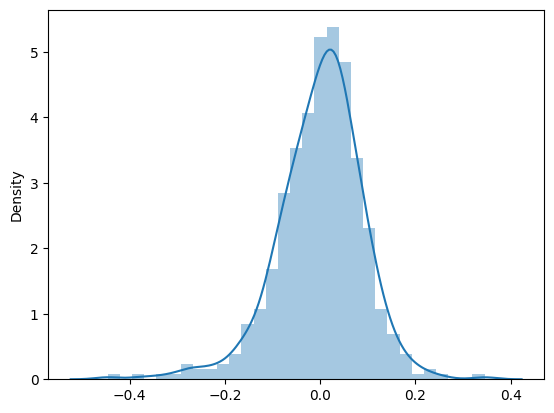

In [162]:
res=y_train-y_train_pred

sns.distplot(res)
plt.show()

### Linearity Check

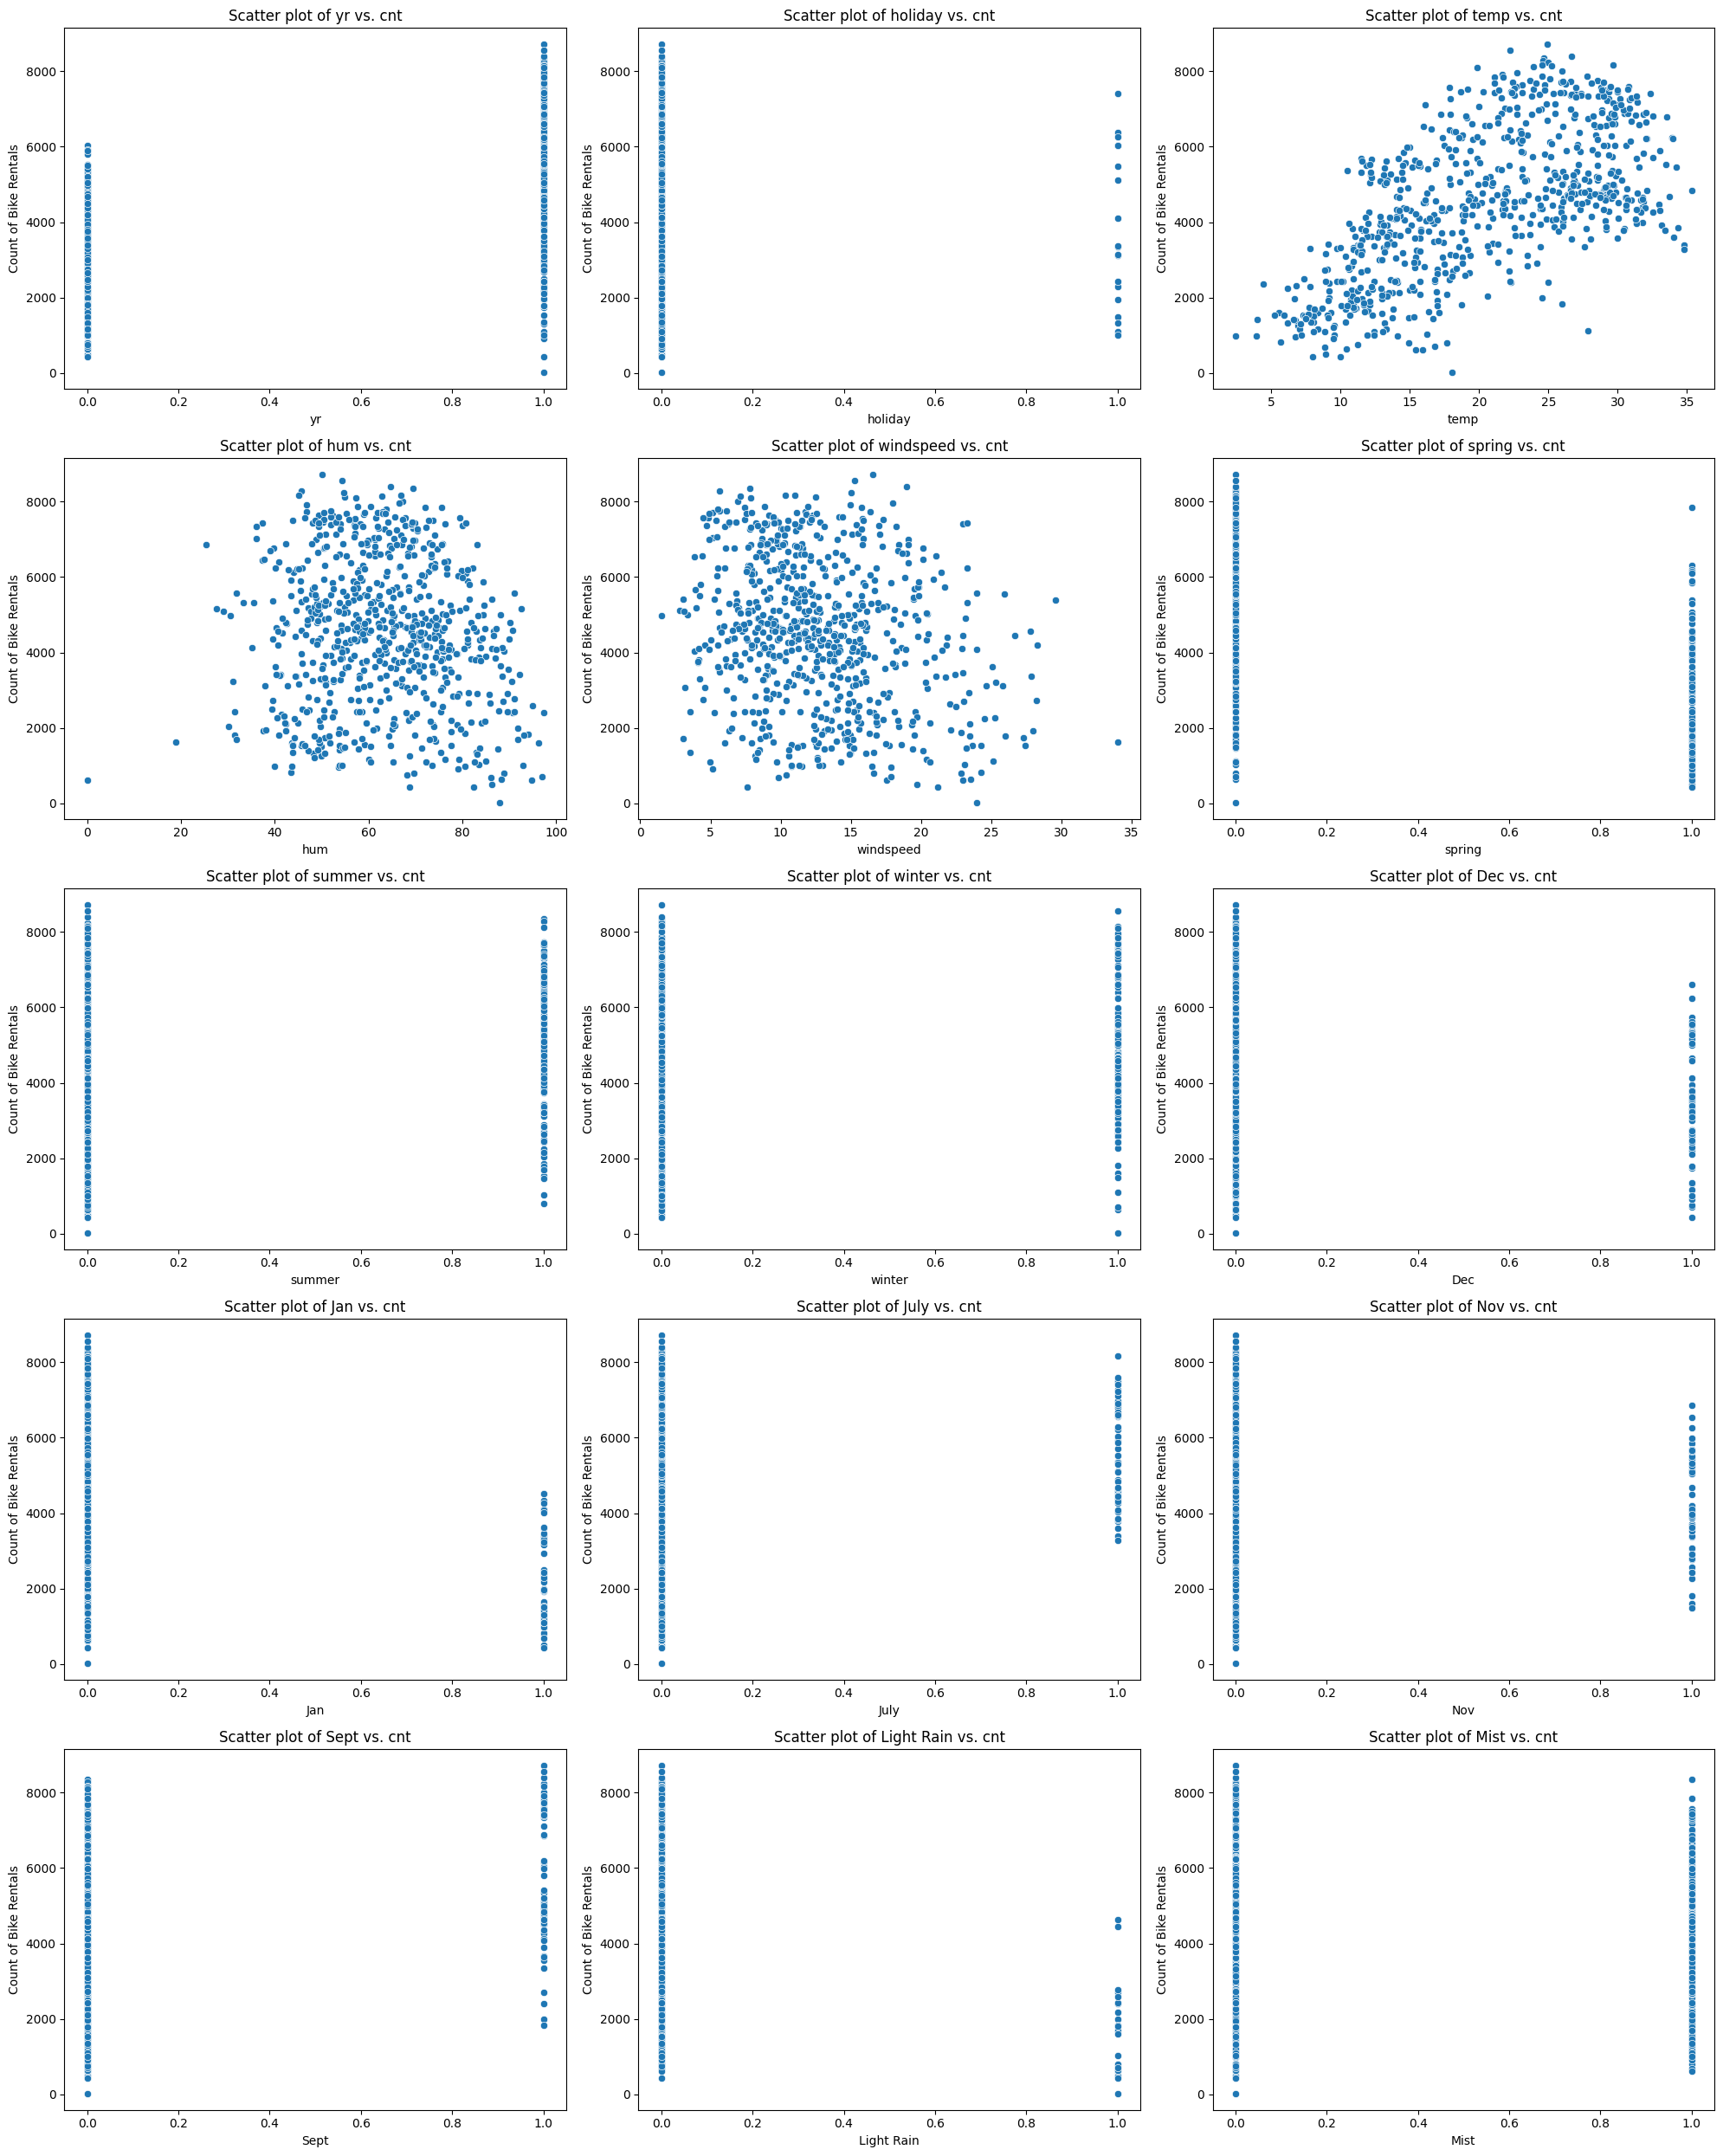

In [163]:
# Calculate the number of rows needed
# Round up division
num_rows = -(-len(selected_feature) // 3)

# Initialize variables
n = 1

# Assuming selected_feature is a list of feature names you want to plot
plt.figure(figsize=(20, 5 * num_rows))
for feature in selected_feature:
    plt.subplot(num_rows, 3, n)
    sns.scatterplot(x=bike_data[feature], y=bike_data['cnt'])
    plt.title(f'Scatter plot of {feature} vs. cnt')
    plt.xlabel(feature)
    plt.ylabel('Count of Bike Rentals')
    n += 1

    # Break the loop if we have created all the plots
    if n > len(selected_feature):
        break

plt.tight_layout()
plt.show()


### Multicollinearity

In [164]:
bike_data[selected_feature].corr()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sept,Light Rain,Mist
yr,1.000000e+00,0.008195,0.048789,-0.112547,-0.011624,3.225068e-16,-1.751358e-17,-1.096204e-16,3.709668e-17,5.516768e-17,1.465455e-16,-2.983215e-17,-2.138778e-17,-0.073758,-0.005796
holiday,8.195345e-03,1.000000,-0.028764,-0.015662,0.006257,3.464187e-02,-2.440810e-02,1.678505e-02,6.362682e-03,3.575989e-02,6.362682e-03,6.785194e-02,8.174933e-03,-0.029619,-0.018668
temp,4.878919e-02,-0.028764,1.000000,0.128565,-0.158186,-6.194080e-01,1.548756e-01,-2.255900e-01,-2.856645e-01,-4.315050e-01,4.327222e-01,-2.066901e-01,1.977294e-01,-0.058461,-0.096297
hum,-1.125471e-01,-0.015662,0.128565,1.000000,-0.248506,-1.848840e-01,-2.870035e-03,1.639076e-01,8.220022e-02,-8.955482e-02,-6.375685e-02,-5.837193e-03,1.831181e-01,0.267592,0.490628
windspeed,-1.162435e-02,0.006257,-0.158186,-0.248506,1.000000,1.788801e-01,9.742067e-02,-1.356120e-01,-5.461552e-02,6.211669e-02,-9.608996e-02,-2.587339e-02,-9.482530e-02,0.117332,-0.037177
spring,3.225068e-16,0.034642,-0.619408,-0.184884,0.178880,1.000000e+00,-3.320989e-01,-3.248593e-01,7.652343e-02,5.325406e-01,-1.742860e-01,-1.711958e-01,-1.711958e-01,-0.022400,0.029198
summer,-1.751358e-17,-0.024408,0.154876,-0.002870,0.097421,-3.320989e-01,1.000000e+00,-3.296500e-01,-1.768562e-01,-1.768562e-01,-1.768562e-01,-1.737204e-01,-1.737204e-01,-0.043283,0.040011
winter,-1.096204e-16,0.016785,-0.225590,0.163908,-0.135612,-3.248593e-01,-3.296500e-01,1.000000e+00,2.847396e-01,-1.730008e-01,-1.730008e-01,5.269844e-01,1.591136e-02,0.093128,0.033857
Dec,3.709668e-17,0.006363,-0.285664,0.082200,-0.054616,7.652343e-02,-1.768562e-01,2.847396e-01,1.000000e+00,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.116872e-02,0.035760,0.063484
Jan,5.516768e-17,0.035760,-0.431505,-0.089555,0.062117,5.325406e-01,-1.768562e-01,-1.730008e-01,-9.281437e-02,1.000000e+00,-9.281437e-02,-9.116872e-02,-9.116872e-02,-0.023035,0.032297


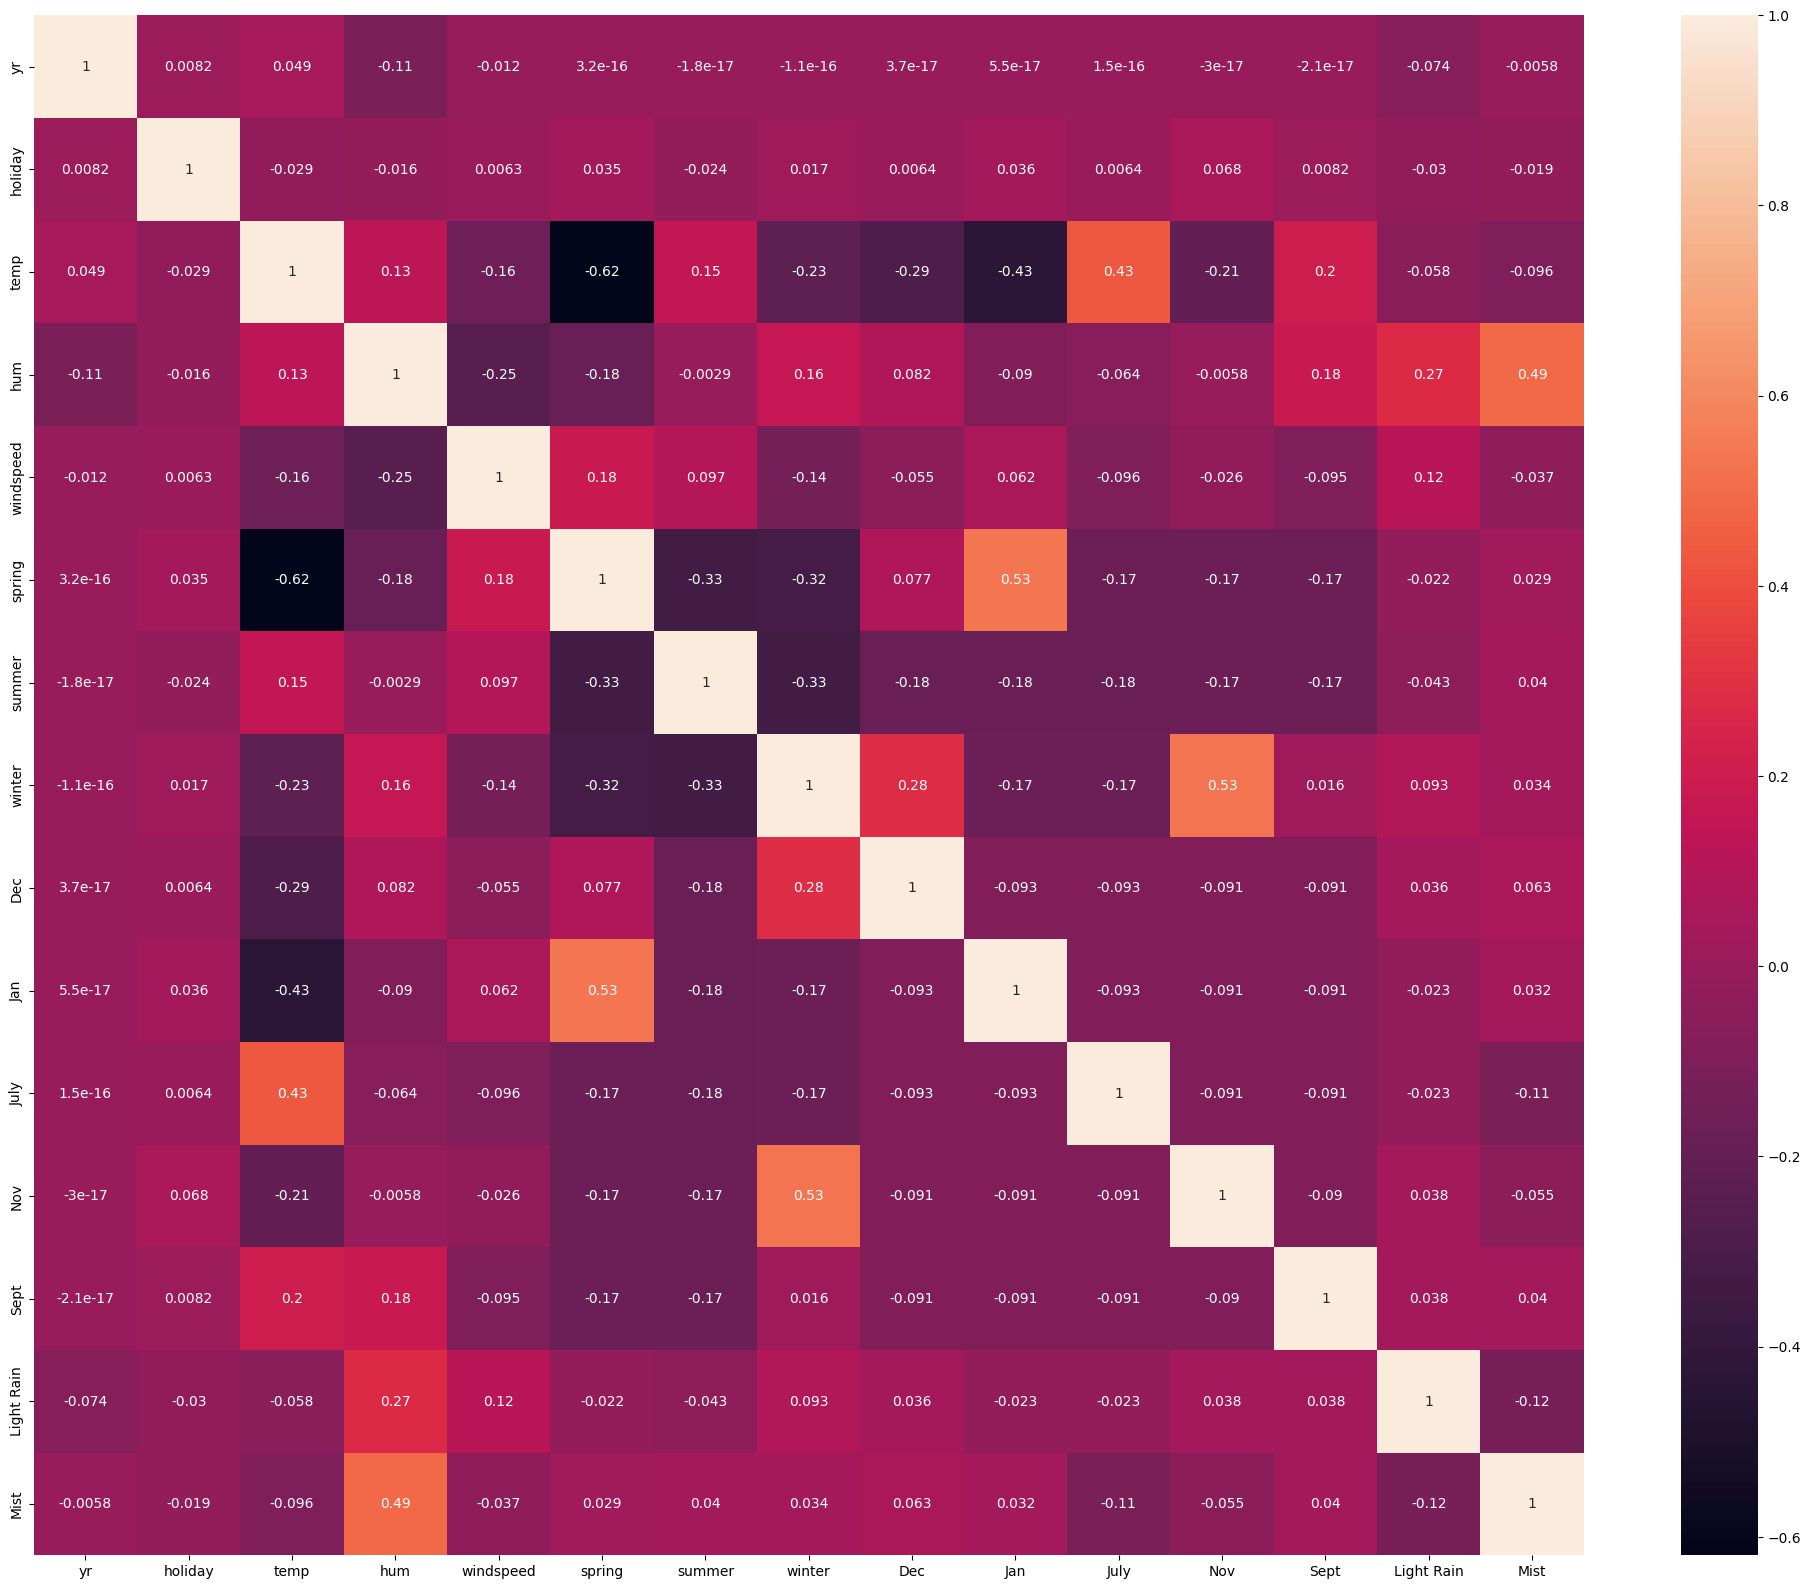

In [165]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_data[selected_feature].corr(),annot=True)
plt.show()

### Homoscedasticity

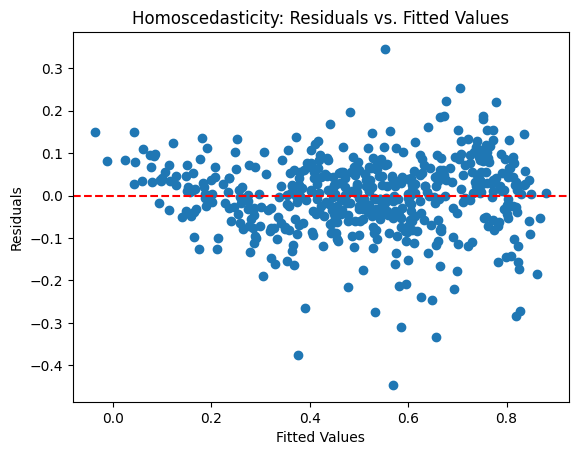

In [166]:
# plotting scatter 
plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Fitted Values')
plt.show()


### Autocorrelation of Residuals

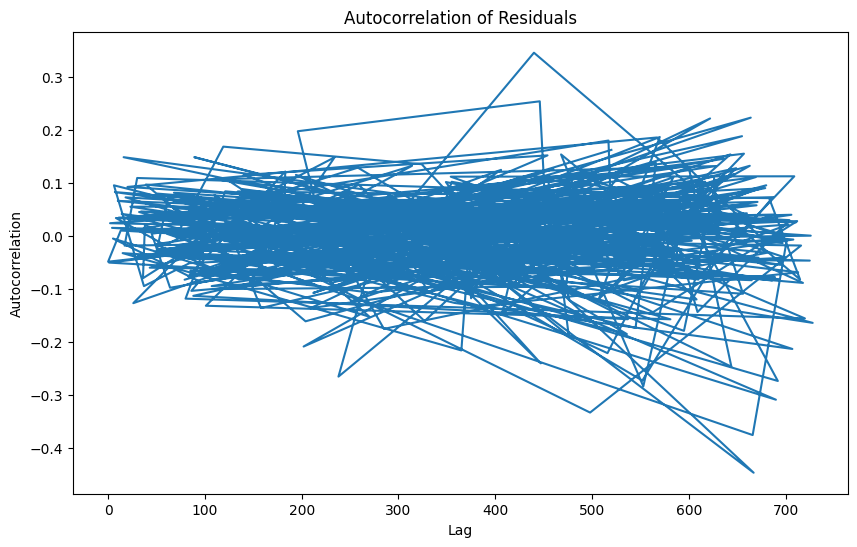

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(res)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Residuals')
plt.show()

### Predictions and Evaluation on the Test Set

Next, we need to replicate the steps and processes we've followed for the training dataset on the test dataset to ensure consistency and validate our model's performance.

In [168]:
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [169]:
# Performing standardization  
df_test[num_vars]= scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
# description 
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
y_test=df_test.pop('cnt')
X_test=df_test

In [172]:
#Add constant 
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [173]:
# Storing all the selected features
X_test_sm = X_test_sm[selected_feature] 

# Add constant for X_test_sm if the model includes an intercept
X_test_sm = sm.add_constant(X_test_sm)

# Drop the 'hum' 
X_test_sm.drop('hum', axis=1, inplace=True, errors='ignore')

In [174]:
# Predict using the trained model
y_test_pred = lr_model.predict(X_test_sm)

### Evaluate

#### R2

In [175]:
# Importing lib 
from sklearn.metrics import r2_score

In [176]:
# Calculate R-squared on the test set
r2_test = r2_score(y_test, y_test_pred)
print("R-squared on test set:", r2_test)

R-squared on test set: 0.8136761325817871


#### Adjusted R2

In [177]:
# Number of observations
n = X_test_sm.shape[0]

# Number of predictors (excluding the constant term)
 # Subtract 1 for the constant term
p = X_test_sm.shape[1] - 1 

# Calculate adjusted R-squared
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1)) / (n - p - 1)

print("Adjusted R-squared on test set:", adjusted_r2_test)

Adjusted R-squared on test set: 0.8009515757824945


<Figure size 640x480 with 0 Axes>

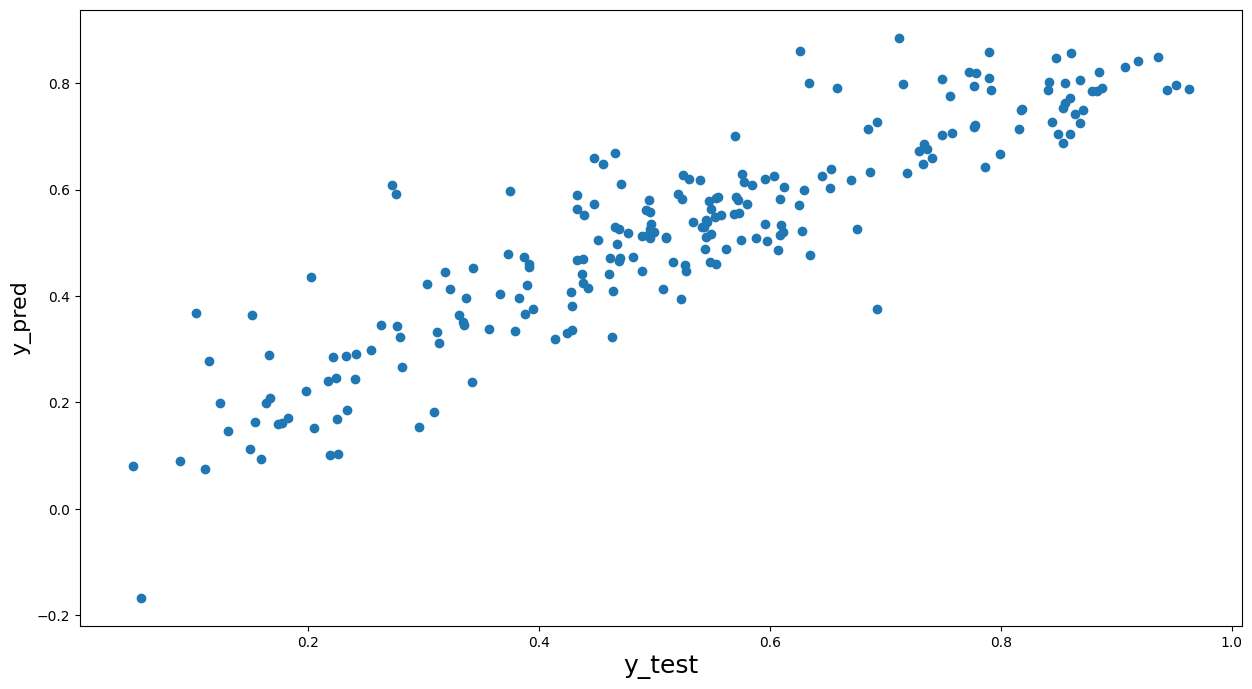

In [178]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)        
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

Regression plot

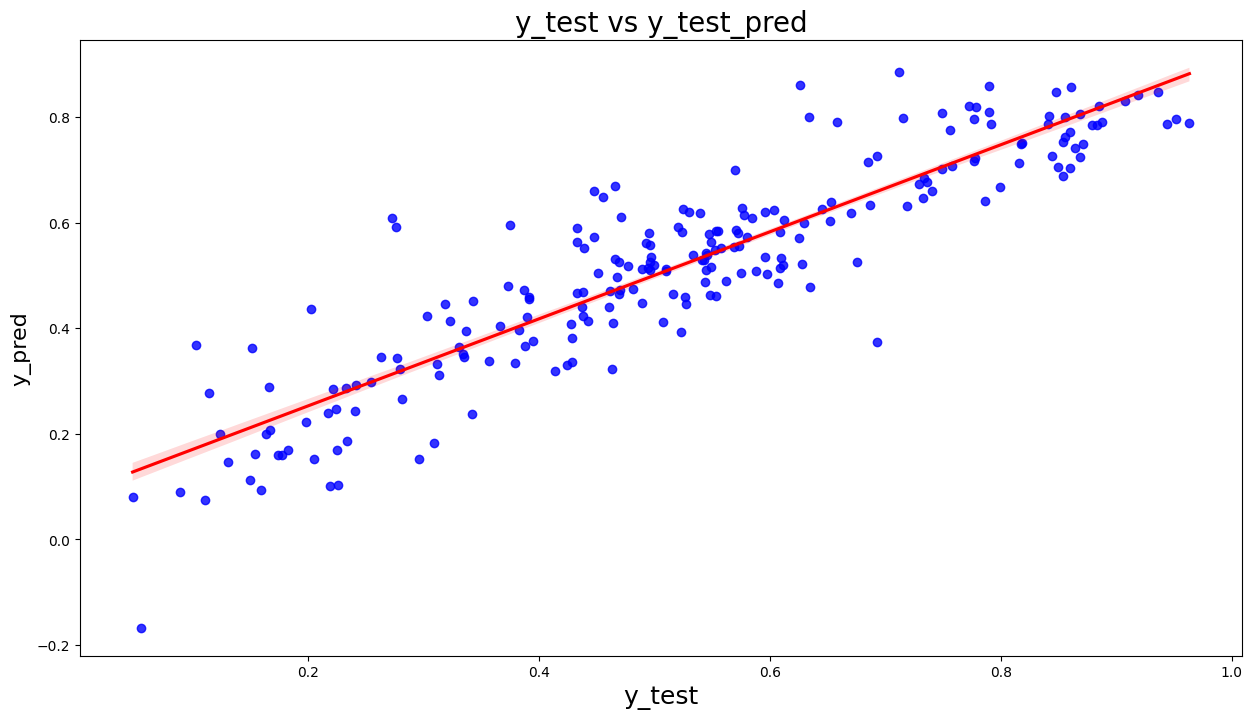

In [179]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Plot heading
plt.title('y_test vs y_test_pred', fontsize=20)
# X-label               
plt.xlabel('y_test', fontsize=18)
# Y-label                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [180]:
# Extract coefficients (including intercept)
coefficients = lr_model.params

# Extract the intercept (constant)
intercept = coefficients['const']

# Extract the coefficients for the features
feature_coefficients = coefficients.drop('const')

# Construct the equation
equation = "count = {:.4f} (intercept)".format(intercept)
for feature, coef in feature_coefficients.items():
    equation += " + {:.4f} * {}".format(coef, feature)

print("The equation of the best-fitted line is:\n" + equation)


The equation of the best-fitted line is:
count = 0.2450 (intercept) + 0.2345 * yr + -0.0918 * holiday + 0.4387 * temp + -0.1585 * windspeed + -0.0713 * spring + 0.0349 * summer + 0.0869 * winter + -0.0428 * Dec + -0.0500 * Jan + -0.0500 * July + -0.0395 * Nov + 0.0687 * Sept + -0.2917 * Light Rain + -0.0801 * Mist


In [181]:
# Checking coef of each
lr_model.params

const         0.245029
yr            0.234455
holiday      -0.091776
temp          0.438717
windspeed    -0.158482
spring       -0.071257
summer        0.034890
winter        0.086883
Dec          -0.042806
Jan          -0.050008
July         -0.050046
Nov          -0.039513
Sept          0.068730
Light Rain   -0.291749
Mist         -0.080073
dtype: float64

### Train Model vs Test Model

In [182]:
# We have calculated the R2 and Adjusted R2 for test model now we will look for train and note them.

# Calculate R-squared on the train set
r2_train = r2_score(y_train, y_train_pred)
print("R-squared on train set:", r2_train)

R-squared on train set: 0.8391472034949233


In [183]:
# Adjusted R2 for train model
# Number of observations
n = X_train_sm.shape[0]

# Number of predictors (excluding the constant term)
 # Subtract 1 for the constant term
p = X_train_sm.shape[1] - 1 

# Calculate adjusted R-squared
adjusted_r2_train = 1 - ((1 - r2_train) * (n - 1)) / (n - p - 1)

print("Adjusted R-squared on train set:", adjusted_r2_train)

Adjusted R-squared on train set: 0.8345978314725575


#### Train and Test Model Comparison :
| Metric                      | Training Set | Test Set     |
|------------------------------|--------------|--------------|
| R-squared                   | 0.839        | 0.814        |
| Adjusted R-squared          | 0.835        | 0.801        |


### Interpretation 

The temperature variable exhibits the most significant impact on bike rentals, with a coefficient of 0.438717. This implies that a one-unit increase in temperature leads to a 0.438717 unit increase in bike rentals.

Furthermore, certain variables, such as spring, misty etc display negative coefficients. A negative coefficient indicates that an increase in these independent variables corresponds to a decrease in the dependent variable, while keeping other factors constant. The coefficient value quantifies the change in the mean of the dependent variable when the independent variable shifts by one unit.

#### Can Try with :
BoomBikes should prioritize their focus on temperature, particularly during the Summer and Winter seasons, as well as the month of September, given their substantial positive influence on bike rentals.

It's also essential to note that variables like Spring, Misty/Cloudy weather, and Light Snow exhibit negative coefficients, indicating a negative correlation with bike rentals. Therefore, BoomBikes should be mindful of these factors and their potential to decrease bike rentals.